In [1]:
from python_prtree import PRTree
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
import random
import gc
%matplotlib inline

In [2]:
def f(N):
    idx = np.arange(N)
    x = np.random.rand(N, 4)
    x[:, 1] = x[:, 0] + x[:, 1] / np.sqrt(N) / 100
    x[:, 3] = x[:, 2] + x[:, 3] / np.sqrt(N) / 100
    s = time.time()
    prtree = PRTree(idx, x)
    t = time.time()
    x = np.random.rand(100_000, 4)
    x[:, 1] = x[:, 0] + x[:, 1] / np.sqrt(N) / 100
    x[:, 3] = x[:, 2] + x[:, 3] / np.sqrt(N) / 100
    t2 = time.time()
    out = prtree.batch_query(x)
    u = time.time()
    out = [prtree.query(y) for y in x]
    u1 = time.time()
    del_list = random.sample(idx.tolist(), k=min(N, 100_000))
    u2 = time.time()
    for k in del_list:
        prtree.erase(k)
    v = time.time()
    
    x = np.random.rand(min(N, 100_000), 4)
    x[:, 1] = x[:, 0] + x[:, 1] / np.sqrt(N) / 100
    x[:, 3] = x[:, 2] + x[:, 3] / np.sqrt(N) / 100
    v2 = time.time()
    for i, k in enumerate(del_list):
        prtree.insert(k, x[i])
    return t - s, u - t2, (u1 - u), (v - u2), (time.time() - v2)

In [3]:
f(1_000_000)

(0.3895833492279053,
 0.0668482780456543,
 0.5829372406005859,
 0.5167562961578369,
 0.7441256046295166)

In [4]:
x = []
y1 = []
y2 = []
y22 = []
y3 = []
y4 = []
for i in list(range(7, 25))[::-1]:
    n = int(1.5 ** (23 + i))
    print(n, end=', ')
    x.append(n)
    s, t, t2, u,v = f(n)
    y1.append(s)
    y2.append(t)
    y22.append(t2)
    y3.append(u)
    y4.append(v)
    gc.collect()

188924888, 125949925, 83966617, 55977744, 37318496, 24878997, 16585998, 11057332, 7371554, 4914369, 3276246, 2184164, 1456109, 970739, 647159, 431439, 287626, 191751, 

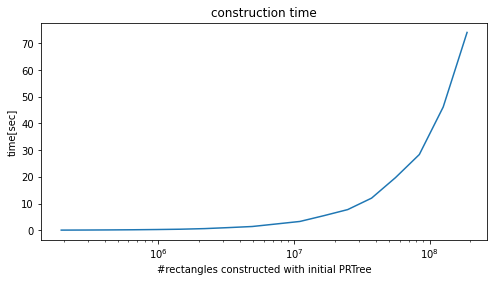

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(x, y1)
plt.xscale('log')
plt.xlabel('#rectangles constructed with initial PRTree')
plt.ylabel('time[sec]')
plt.title('construction time')
plt.savefig('./images/fig1.png')

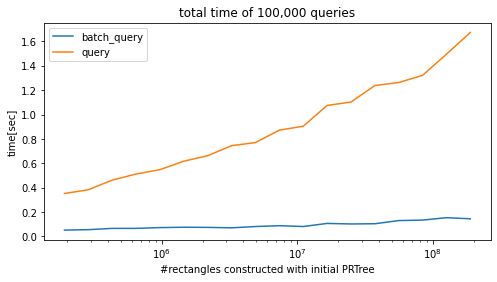

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(x, y2, label='batch_query')
plt.plot(x, y22, label='query')
plt.xscale('log')
plt.xlabel('#rectangles constructed with initial PRTree')
plt.legend()
plt.ylabel('time[sec]')
plt.title('total time of 100,000 queries')
plt.savefig('./images/fig2.png')

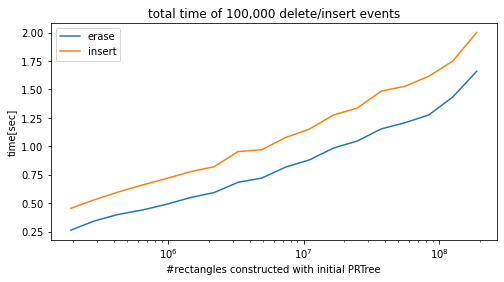

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(x, y3, label='erase')
plt.plot(x, y4, label='insert')
plt.xscale('log')
plt.legend()
plt.xlabel('#rectangles constructed with initial PRTree')
plt.ylabel('time[sec]')
plt.title('total time of 100,000 delete/insert events')
plt.savefig('./images/fig3.png')